<a href="https://colab.research.google.com/github/iwolfer37/homework/blob/master/Homework55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Гіперпараметри
z_dim = 100
image_dim = 28 * 28
lr = 0.0002
batch_size = 128
num_epochs = 107

In [3]:
# Завантаження даних MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 102957577.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 113422934.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38604561.60it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23753776.52it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# Генератор
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, image_dim),
            nn.Tanh()
        )
    def forward(self, x):
        return self.model(x)

In [5]:
# Дискримінатор
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

In [6]:
# Ініціалізація моделей та оптимізаторів
generator = Generator()
discriminator = Discriminator()
criterion = nn.BCELoss()
optimizer_g = torch.optim.Adam(generator.parameters(), lr=lr)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=lr)

In [7]:
# Навчання
for epoch in range(num_epochs):
    for real_images, _ in train_loader:
        batch_size = real_images.shape[0]
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Навчання дискримінатора
        optimizer_d.zero_grad()
        real_outputs = discriminator(real_images.view(batch_size, -1))
        real_loss = criterion(real_outputs, real_labels)

        z = torch.randn(batch_size, z_dim)
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_d.step()

        # Навчання генератора
        optimizer_g.zero_grad()
        fake_outputs = discriminator(fake_images)
        g_loss = criterion(fake_outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()

    print(f"Епоха [{epoch+1}/{num_epochs}], Дискримінатора Втрати: {d_loss.item():.4f}, Генератор Втрати: {g_loss.item():.4f}")

Епоха [1/107], Дискримінатора Втрати: 0.0564, Генератор Втрати: 4.6968
Епоха [2/107], Дискримінатора Втрати: 0.0540, Генератор Втрати: 4.4932
Епоха [3/107], Дискримінатора Втрати: 0.1157, Генератор Втрати: 5.7199
Епоха [4/107], Дискримінатора Втрати: 0.7055, Генератор Втрати: 3.6065
Епоха [5/107], Дискримінатора Втрати: 0.4859, Генератор Втрати: 3.3147
Епоха [6/107], Дискримінатора Втрати: 0.3560, Генератор Втрати: 2.2746
Епоха [7/107], Дискримінатора Втрати: 0.9047, Генератор Втрати: 1.9014
Епоха [8/107], Дискримінатора Втрати: 0.3395, Генератор Втрати: 2.2339
Епоха [9/107], Дискримінатора Втрати: 0.4812, Генератор Втрати: 2.5688
Епоха [10/107], Дискримінатора Втрати: 0.3508, Генератор Втрати: 3.3136
Епоха [11/107], Дискримінатора Втрати: 0.2167, Генератор Втрати: 4.9956
Епоха [12/107], Дискримінатора Втрати: 0.4895, Генератор Втрати: 3.1622
Епоха [13/107], Дискримінатора Втрати: 0.2755, Генератор Втрати: 3.0258
Епоха [14/107], Дискримінатора Втрати: 0.2756, Генератор Втрати: 5.9255
Е

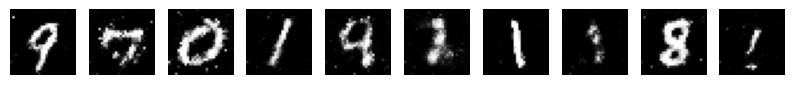

In [8]:
# Генерація та відображення зображень
z = torch.randn(10, z_dim)
generated_images = generator(z)

fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    axes[i].imshow(generated_images[i].detach().view(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()